<h1 style='color:purple' align='center'>Project: Anomaly Detection</h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('creditcardfraud.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,111096.0,2.095273,0.005363,-1.448645,0.320803,0.366733,-0.647091,-0.007670,-0.280977,2.187868,...,0.090701,0.622382,0.006800,0.352553,0.323243,-0.466764,-0.026065,-0.058691,1.00,0
1,79272.0,1.158282,-0.180178,0.967549,0.888652,-0.957101,-0.412826,-0.436789,-0.008261,0.808686,...,0.074346,0.398780,-0.123952,0.457047,0.485607,0.507722,0.001095,0.022840,29.90,0
2,132593.0,1.953608,-0.626281,-0.273542,0.523814,-1.008114,-0.605656,-0.737915,0.030429,1.513787,...,0.150353,0.537825,0.159876,-0.009313,-0.335374,0.573685,-0.033367,-0.047451,28.75,0
3,152511.0,0.191138,0.975684,-0.306871,-0.184487,0.998363,-1.317371,1.216015,-0.518100,0.015540,...,0.236043,1.134086,-0.216546,-0.053337,-0.329110,-0.167737,0.229836,-0.028356,8.61,0
4,140096.0,-3.539055,-4.193024,-3.026249,2.160445,3.760330,-2.281773,0.117071,0.305625,-1.052794,...,1.172759,1.406402,0.650456,0.282794,-0.968230,-0.437851,0.445302,-0.347395,329.96,0


The dataset consists of 30 features and 1 one target label column. The 30 features comprises highly sensitive information like Geolocation(IP Address, Location), Bank related details i.e.(Account Number, Transaction ID, Account Type) and Time Series like time between transactions and velocity at which transactions occurred. So, for anonymity of data the dataset has features in Vn format and are scaled already.

In [3]:
df.shape

(10492, 31)

In [4]:
df.isnull().sum().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10492 entries, 0 to 10491
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    10492 non-null  float64
 1   V1      10492 non-null  float64
 2   V2      10492 non-null  float64
 3   V3      10492 non-null  float64
 4   V4      10492 non-null  float64
 5   V5      10492 non-null  float64
 6   V6      10492 non-null  float64
 7   V7      10492 non-null  float64
 8   V8      10492 non-null  float64
 9   V9      10492 non-null  float64
 10  V10     10492 non-null  float64
 11  V11     10492 non-null  float64
 12  V12     10492 non-null  float64
 13  V13     10492 non-null  float64
 14  V14     10492 non-null  float64
 15  V15     10492 non-null  float64
 16  V16     10492 non-null  float64
 17  V17     10492 non-null  float64
 18  V18     10492 non-null  float64
 19  V19     10492 non-null  float64
 20  V20     10492 non-null  float64
 21  V21     10492 non-null  float64
 22

In [6]:
df.Amount.describe()

count    10492.000000
mean        90.296560
std        308.696285
min          0.000000
25%          4.990000
50%         21.245000
75%         77.142500
max      18910.000000
Name: Amount, dtype: float64

In [7]:
df[df['Class'] == 1]['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [8]:
df[df['Class'] == 0]['Amount'].describe()

count    10000.000000
mean        88.726354
std        310.957193
min          0.000000
25%          5.370000
50%         21.900000
75%         75.460000
max      18910.000000
Name: Amount, dtype: float64

Text(0, 0.5, 'Class')

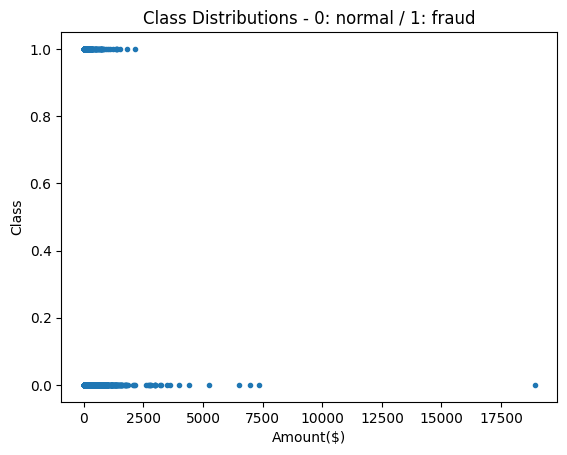

In [9]:
plt.scatter(df.Amount,df.Class,marker='.')
plt.title('Class Distributions - 0: normal / 1: fraud', fontsize=12)
plt.xlabel('Amount($)')
plt.ylabel('Class')

Text(0.5, 1.0, 'Class Distributions - 0: normal / 1: fraud')

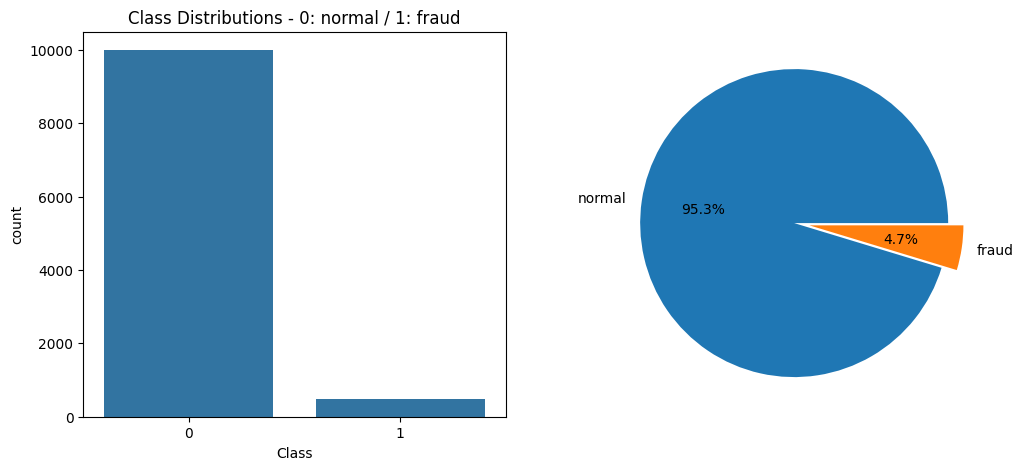

In [10]:
plt.figure(figsize=(12,5))
label=['normal','fraud']
explode=[0.05,0.05]
plt.subplot(1,2,2)
plt.pie(df['Class'].value_counts(),autopct="%0.1f%%",labels=label,explode=explode,shadow=False)
plt.subplot(1,2,1)
sn.countplot(x='Class',data = df)
plt.title('Class Distributions - 0: normal / 1: fraud', fontsize=12)

Text(0.5, 1.0, 'Number of Transactions per Amount\n Class : fraud')

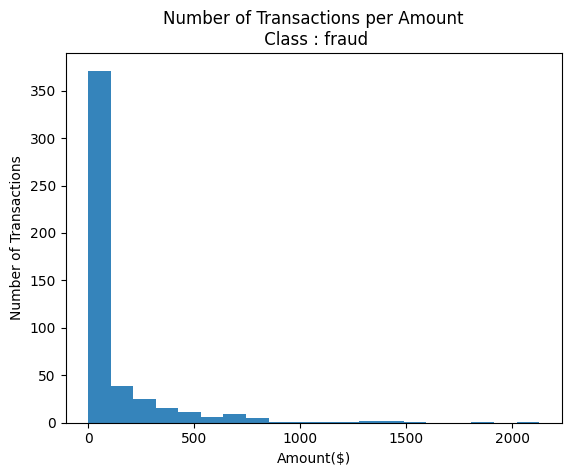

In [11]:
subset_class_1 = df[df['Class'] == 1]['Amount']
plt.hist(subset_class_1, bins=20, alpha=0.9)
plt.xlabel('Amount($)')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions per Amount\n Class : fraud')

Text(0.5, 1.0, 'Number of Transactions per Amount\n Class : normal')

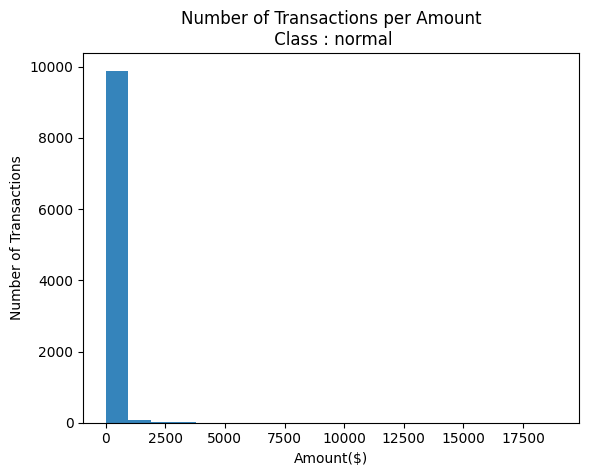

In [12]:
subset_class_0 = df[df['Class'] == 0]['Amount']
plt.hist(subset_class_0, bins=20, alpha=0.9)
plt.xlabel('Amount($)')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions per Amount\n Class : normal')

In [13]:
cols = [c for c in df.columns if c not in ['Class']]
features = df[cols]
target = df['Class']

<h2 style='color:blue'>Handling imbalance dataset using SMOTE</h2>

In [14]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(features,target)

y_sm.value_counts()

Class
0    10000
1    10000
Name: count, dtype: int64

In [15]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, classification_report
fraud_customers=df['Class'].value_counts()[1]/len(df)
clf=IsolationForest()#n_estimators=100, max_samples=len(x_sm),contamination=fraud_customers)
clf.fit(x_sm)
ypred=clf.predict(x_sm)
ypred[ypred ==1] =0
ypred[ypred== -1] =1
print("accuracy score",accuracy_score(ypred, y_sm))
print("Report",classification_report(ypred, y_sm))

accuracy score 0.6148
Report               precision    recall  f1-score   support

           0       0.99      0.57      0.72     17442
           1       0.24      0.95      0.39      2558

    accuracy                           0.61     20000
   macro avg       0.61      0.76      0.55     20000
weighted avg       0.89      0.61      0.68     20000



In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=0.2,random_state=48)

In [17]:
from sklearn.ensemble import RandomForestClassifier
rcf=RandomForestClassifier()
rcf.fit(x_train,y_train)

RandomForestClassifier()

In [18]:
ypred=rcf.predict(x_test)
rcf.score(x_test,y_test)

0.9945

In [19]:
ypred=rcf.predict(x_test)
print("accuracy score",accuracy_score(ypred, y_test))
print("Report",classification_report(ypred, y_test))

accuracy score 0.9945
Report               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2033
           1       0.99      1.00      0.99      1967

    accuracy                           0.99      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000

